# Stop points detection

<div class="alert alert-block alert-success">
<b>Up to you:</b> To launch this notebook, you have to:<br/>
1. Go to tracklib/doc/source/notebook on a console,<br/>
2. Start the notebook server from the command line: jupyter notebook,<br/>
3. You should see the notebook open in your browser. Open "Switchbacks" by clicking on the link.<br/>
</div>

Présentation de 4 méthodes pour détecter les points stops

<div class="alert alert-block alert-info">
<b>References:</b> <br/>
</div>

## Import de la librairie tracklib

In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import os.path
import sys

#-------------------------------------------------------
# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
from tracklib.core.GPSTime import GPSTime
import tracklib.algo.Interpolation as interpolation
import tracklib.algo.Analytics as stop
from tracklib.core.Plot import Plot
from tracklib.algo.Segmentation import findStopsGlobal
import tracklib.core.Utils as utils
from tracklib.io.TrackReader import TrackReader

-------------------------------------
GPS track #0 of user 0:
-------------------------------------
  Nb of pt(s):   1351
  Ref sys id   : ENU
  Starting at  : 31/01/2018 11:36:56
  Ending at    : 31/01/2018 11:59:26
  Duration     : 1350.000 s
  Length       : 3416.344 m
-------------------------------------



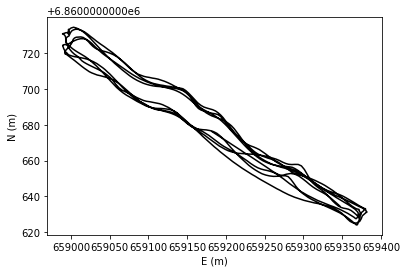

In [2]:
path = '../../../data/gpx/vincennes.gpx'
GPSTime.setReadFormat("4Y-2M-2DT2h:2m:2sZ")
tracks = TrackReader.readFromGpx(path, srid='ENU')
trace = tracks[0]
trace = trace.extract(1150, 2500)

trace.summary()
trace.plot()

import tracklib.algo.Cinematics as Cinematics
Cinematics.computeAbsCurv(trace)

plot = Plot(trace)

In [3]:
# -----------------------------------------------------------------------------
# Première méthode
trace.createAnalyticalFeature('stop_point_with_time_window_criteria', stop.VAL_AF_TIME_WINDOW_NONE)
trace.addAnalyticalFeature(stop.stop_point_with_time_window_criteria, 'stop_point_with_time_window_criteria')
print ()


<AxesSubplot:title={'center':'Track 0'}, xlabel='E (m)', ylabel='N (m)'>

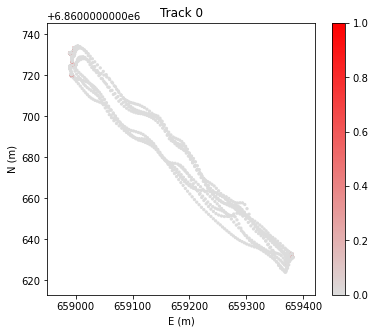

In [4]:
# -----------------------------------------------------------------------------
# Deuxième méthode
trace.addAnalyticalFeature(stop.stop_point_with_acceleration_criteria)
COLS = utils.getColorMap((220, 220, 220), (255, 0, 0))
trace.plot(type='POINT', af_name='stop_point_with_acceleration_criteria', append = False, cmap = COLS)


In [5]:
# -----------------------------------------------------------------------------
# Troisième méthode 
stops = findStopsGlobal(trace, downsampling=5, diameter=30, duration=40)
# print (len(stops))
trace.createAnalyticalFeature('cost_matrix', stop.VAL_AF_TIME_WINDOW_MOVE)
for i in range(trace.size()):
    for s in range(stops.size()):
        idstop = stops.getObsAnalyticalFeature('id_ini', s)
        if idstop == i:
            trace.setObsAnalyticalFeature('cost_matrix', i, stop.VAL_AF_TIME_WINDOW_STOP)


 52% (140 of 268) |###########           | Elapsed Time: 0:00:00 ETA:   0:00:00

Minimal enclosing circles computation:


100% (268 of 268) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (48 of 267) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:00

Optimal split search:


100% (267 of 267) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


In [6]:
# -----------------------------------------------------------------------------
# Quatrième méthode 

/home/marie-dominique/tracklib/tracklib/core/Plot.py:354: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(


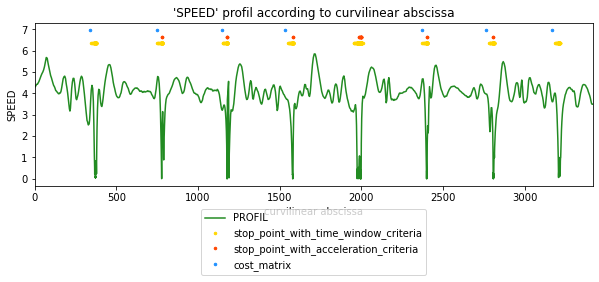

In [7]:
# -----------------------------------------------------------------------------
# # On dessine
TAB_AFS = ['stop_point_with_time_window_criteria', 
           'stop_point_with_acceleration_criteria', 
           'cost_matrix']
plot.plotProfil('SPATIAL_SPEED_PROFIL', TAB_AFS)